Steps for building a ML Model
- import the estimator (model)
- create an instance of the estimator
- use the training data to train the estimator
- evaluate the model
- make prediction

## Data Preparation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
header = []
with open("communities.names","r") as f:
    for line in f:
        if line.startswith('@attribute '):
            word = line.split(' ')
            header.append(word[1])

In [5]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
crime = pd.read_csv('communities.data', header=None, names= header ,na_values='?', index_col='communityname')

In [6]:
crime.head()

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
communityname,,,,,,,,,,,,,,,,,,,,,
Lakewoodcity,8,NaN,NaN,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
Tukwilacity,53,NaN,NaN,1,0.00,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
Aberdeentown,24,NaN,NaN,1,0.00,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
Willingborotownship,34,5.0,81440.0,1,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
Bethlehemtownship,42,95.0,6096.0,1,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [7]:
# file = open('communities.names','r')
# print(file.read())

In [8]:
# with open("communities.names","r") as f:
#     for line in f:
#         for word in line.split(" "):
#             print(word)

In [9]:
feature_names = ['householdsize','pctUrban','medIncome','racepctblack','racePctWhite','racePctAsian','racePctHisp']
target_name = 'ViolentCrimesPerPop'

In [10]:
# getting features and the target, sklearn can work directly with

X = crime[feature_names]
y = crime[target_name]

In [11]:
y.head()

communityname
Lakewoodcity           0.20
Tukwilacity            0.67
Aberdeentown           0.43
Willingborotownship    0.12
Bethlehemtownship      0.03
Name: ViolentCrimesPerPop, dtype: float64

In [14]:
X.head()

,householdsize,pctUrban,medIncome,racepctblack,racePctWhite,racePctAsian,racePctHisp
communityname,,,,,,,
Lakewoodcity,0.33,1.0,0.37,0.02,0.90,0.12,0.17
Tukwilacity,0.16,1.0,0.31,0.12,0.74,0.45,0.07
Aberdeentown,0.42,0.0,0.30,0.49,0.56,0.17,0.04
Willingborotownship,0.77,1.0,0.58,1.00,0.08,0.12,0.10
Bethlehemtownship,0.55,0.9,0.50,0.02,0.95,0.09,0.05


## split the data into: training and testing (cross validation)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=123)

- Now the data is ready

#### 1. Import the estimator object (model)

In [16]:
from sklearn.linear_model import LinearRegression

#### 2. Create instance of the estimator

In [17]:
linear_regression_model = LinearRegression()

#### 3. Use training data to train the model / fit data in model

In [18]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

#### 4. Evaluate the model

In [23]:
from sklearn.metrics import mean_squared_error

# get predictions of the model from the data it has not seen (test dataset)
y_pred_test = linear_regression_model.predict(X_test)

#metrics compare in some way how close are the predicted vs the actual values are
error_matric = mean_squared_error(y_pred_test,y_test)
print('The mean Square Error of this model is:', error_matric)

The mean Square Error of this model is: 0.02451512610564626


Text(0.5, 1.0, 'predicted vs actual values')

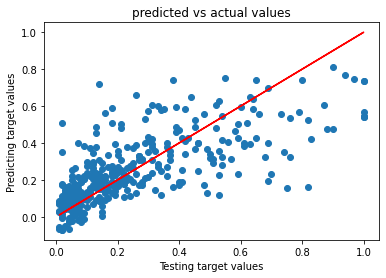

In [26]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test)
ax.plot(y_test, y_test, 'r')

ax.set_xlabel('Testing target values')
ax.set_ylabel('Predicting target values')
ax.set_title('predicted vs actual values')

#### 5. Make Predictions

In [27]:
from collections import OrderedDict

In [31]:
new_data = OrderedDict([
    ('householdsize',0.5),
    ('pctUrban',0.6),
    ('medIncome',0.1),
    ('racepctblack',0.1),
    ('racePctWhite',0.6),
    ('racePctAsian',0.1),
    ('racePctHisp',0.2)
])

# reshaping to make it 2D, because we passed only one new observation
new_data = pd.Series(new_data).values.reshape(1,-1)

# use the model to make prediction
linear_regression_model.predict(new_data)

C:\Users\zatha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.30466662])

For a city with data such as above, our model predicts a target value of 0.30466662